In [19]:
'''
PARÂMETROS PASSADOS
cenario
S=68
I=2
R=0
h=0.1
N_b=12
T_b=24
T_b2=48
tempoT_b2=24
S_b=10
I_b=50
m_k=6
n_k=22
T_k=24
T_k2=12
tempoT_k2=24
periodo=21

PARÂMETROS PADRÃO
t=0
mortes=0
periodo *= 24
'''

'\nPARÂMETROS PASSADOS\ncenario\nS=68\nI=2\nR=0\nh=0.1\nN_b=12\nT_b=24\nT_b2=48\ntempoT_b2=24\nS_b=10\nI_b=50\nm_k=6\nn_k=22\nT_k=24\nT_k2=12\ntempoT_k2=24\nperiodo=21\n\nPARÂMETROS PADRÃO\nt=0\nmortes=0\nperiodo *= 24\n'

In [20]:
import numpy as np
import matplotlib as plt
import pandas as pd
import prettytable as pt

In [21]:
TX_MORTE = 0.02

class Cenario ():
    def __init__(self, cenario, S, I, R, h, N_b, T_b, T_b2, tempoT_b2, S_b, I_b, m_k, n_k, T_k, T_k2, tempoT_k2, periodo):
        self.cenario = cenario
        self.S = S
        self.I = I
        self.R = R
        self.h = h
        self.N_b = N_b
        self.T_b = T_b
        self.T_b2 = T_b2 #(cenário 1)
        self.tempoT_b2 = tempoT_b2
        self.S_b = S_b
        self.I_b = I_b
        self.m_k = m_k
        self.n_k = n_k
        self.T_k = T_k
        self.T_k2 = T_k2 #(cenário 2)
        self.tempoT_k2 = tempoT_k2
        self.periodo = periodo
        # Configurações padrão:
        self.t = 0
        self.mortes = 0
        self.periodo *= 24

    # métodos
    def calcular_b_k(self):
        self.b = self.N_b/(self.T_b*self.S_b*self.I_b)
        self.k = self.m_k/(self.n_k*self.T_k)

    def calcular_sir(self):
        So = self.S
        Io = self.I
        Ro = self.R
        to = self.t

        self.S = So - self.h*self.b*So*Io
        self.I = Io + self.h*(self.b*So*Io - self.k*Io)
        self.R = Ro + self.h*self.k*Io
        self.t = to + self.h

        self.mortes = self.R*TX_MORTE



In [22]:
cenario0 = Cenario(0, 68, 2, 0, 0.1, 12, 24, 48, 24, 10, 50, 6, 22, 24, 12, 24, 21)
cenario1 = Cenario(1, 68, 2, 0, 0.1, 12, 24, 48, 24, 10, 50, 6, 22, 24, 12, 24, 21)
cenario2 = Cenario(2, 68, 2, 0, 0.1, 12, 24, 48, 24, 10, 50, 6, 22, 24, 12, 24, 21)

              S         I          R    mortes      t
0     67.986400  2.011327   0.002273  0.000045    0.1
1     67.972726  2.022716   0.004558  0.000091    0.2
2     67.958977  2.034166   0.006857  0.000137    0.3
3     67.945153  2.045679   0.009168  0.000183    0.4
4     67.931253  2.057254   0.011493  0.000230    0.5
...         ...       ...        ...       ...    ...
5035   0.151264  0.521136  69.327599  1.386552  503.6
5036   0.151256  0.520552  69.328192  1.386564  503.7
5037   0.151249  0.519968  69.328783  1.386576  503.8
5038   0.151241  0.519385  69.329374  1.386587  503.9
5039   0.151233  0.518803  69.329964  1.386599  504.0

[5040 rows x 5 columns]


<Axes: title={'center': 'Cenário 0'}, xlabel='t'>

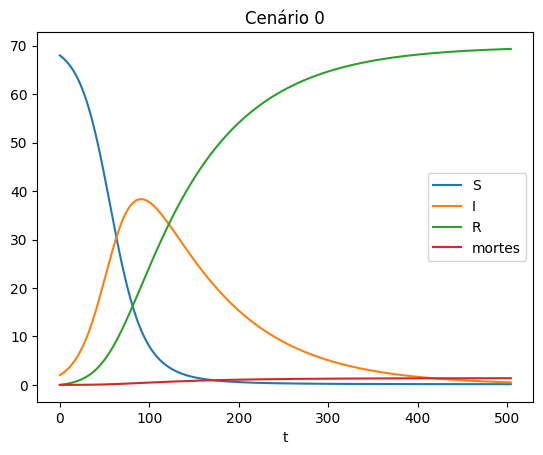

In [23]:
cenario0.calcular_b_k()
data_c0 = {"S": [], "I": [], "R": [], "mortes": [], "t": []}
while cenario0.t <= cenario0.periodo:
    cenario0.calcular_sir()
    data_c0["S"].append(cenario0.S)
    data_c0["I"].append(cenario0.I)
    data_c0["R"].append(cenario0.R)
    data_c0["mortes"].append(cenario0.mortes)
    data_c0["t"].append(cenario0.t)
df_c0 = pd.DataFrame(data_c0)
#print(df_c0)
#plotar gráfico do cenário 0 com matplotlib
df_c0.plot(x="t", y=["S", "I", "R", "mortes"], title="Cenário 0")